# 1. Regression Model Development:

Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

### Import Libraries

In [2]:
!pip install streamlit

In [3]:
!pip install scikit-learn


In [4]:
!pip install matplotlib
!pip install seaborn

In [5]:
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
from sklearn.svm import SVR
import pickle
#import streamlit as st
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

## ***1. Data Collection and Understanding the each Atributes***

### Data ingession

In [9]:
import pandas as pd

flights_df = pd.read_csv('D:\\AlmaBetter\\P01_travelPrice\\data\\flights.csv')

print("\n Flights Data:")
display(flights_df.head())


 Flights Data:


,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### Data Statastics

In [10]:
df = flights_df
def stats(df):
  print("Top five rows")
  print(df.head())
  print("*"*100)
  print("Bottom five rows")
  print(df.tail())
  print("*"*100)
  print("Shape of the dataset")
  print(df.shape)
  print("*"*100)
  print("Info about the dataset")
  print(df.info())
  print("*"*100)
  print("Checking the null values")
  print(df.isnull().sum())
  print("*"*100)
  print("Overall statistics")
  print(df.describe())
  print("*"*100)
  global Numerical_features
  Numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
  global Categorical_features
  Categorical_features = df.select_dtypes(include=['object']).columns.tolist()

  print("Numerical_features:", Numerical_features)
  print("Categorical_features:", Categorical_features)

# Extracted length of each attributes
def unique_values(df):
  for i in df.columns:
    print(i,' : Unique Valuies are : ',len(df[i].unique()))
  print('*'*150)
# Printed all unique values in each attributes
def columns_unique_values(df):
  for col in df:
    print(col,' : Unique Valuies are : ',df[col].unique())
    print('*'*150)

print(unique_values(df))
print(stats(df))
columns_unique_values(df)

travelCode  : Unique Valuies are :  135944
userCode  : Unique Valuies are :  1335
from  : Unique Valuies are :  9
to  : Unique Valuies are :  9
flightType  : Unique Valuies are :  3
price  : Unique Valuies are :  490
time  : Unique Valuies are :  33
distance  : Unique Valuies are :  35
agency  : Unique Valuies are :  3
date  : Unique Valuies are :  999
******************************************************************************************************************************************************
None
Top five rows
   travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   



### About the data

**Description and Understanding:**

- In this travel dataset has 271888 rows and 10 columns, which are :

- **Numerical Numerical_features:**  ['travelCode', 'userCode', 'price', 'time', 'distance']

- **Categorical_features:** ['from', 'to', 'flightType', 'agency']

- Nulls values are not available in the dataset. date attribute need to change the type as date whcih is in object type.

- **Following data represent the each Attribute and its unique values in it:**

travelCode  : Unique Valuies are :  135944

userCode  : Unique Valuies are :  1335

from  : Unique Valuies are :  9

to  : Unique Valuies are :  9

flightType  : Unique Valuies are :  3

price  : Unique Valuies are :  490

time  : Unique Valuies are :  33

distance  : Unique Valuies are :  35

agency  : Unique Valuies are :  3

date  : Unique Valuies are :  999


**From the above data columns like travelCode and userCode are less informative for analysis and that can be eleminates from the data.**


## ***2. Data Wrangling and Preprocessing***

### Changing the datatype from date column as date

In [13]:
df['date'] = pd.to_datetime(df['date'])

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Plot 1: Distribution of Price

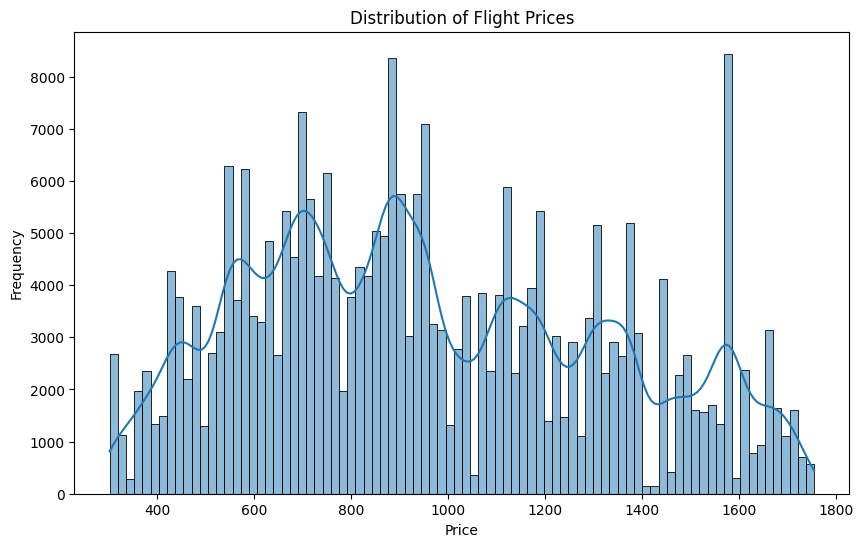

In [14]:
# Plot 1: Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Plot 2: Distribution of Time

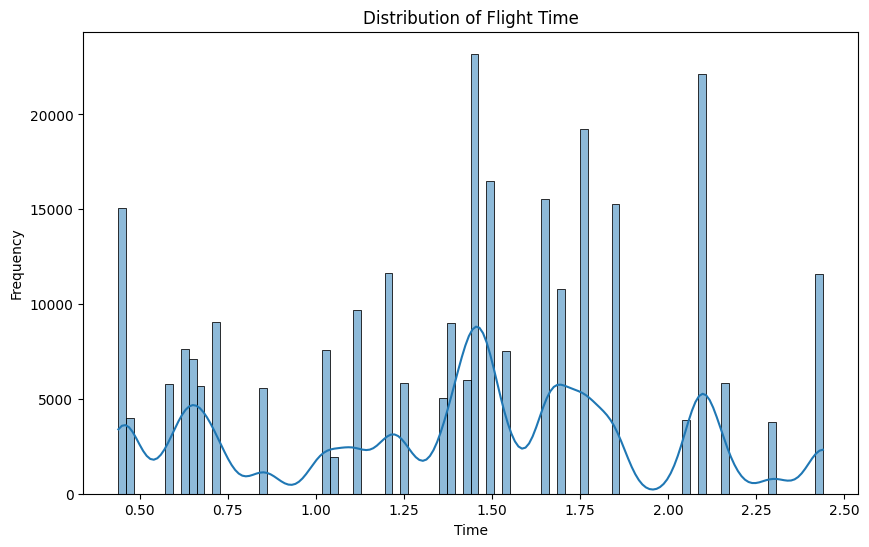

In [15]:
# Plot 2: Distribution of Time
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time', kde=True)
plt.title('Distribution of Flight Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

### Plot 3: Distribution of Distance

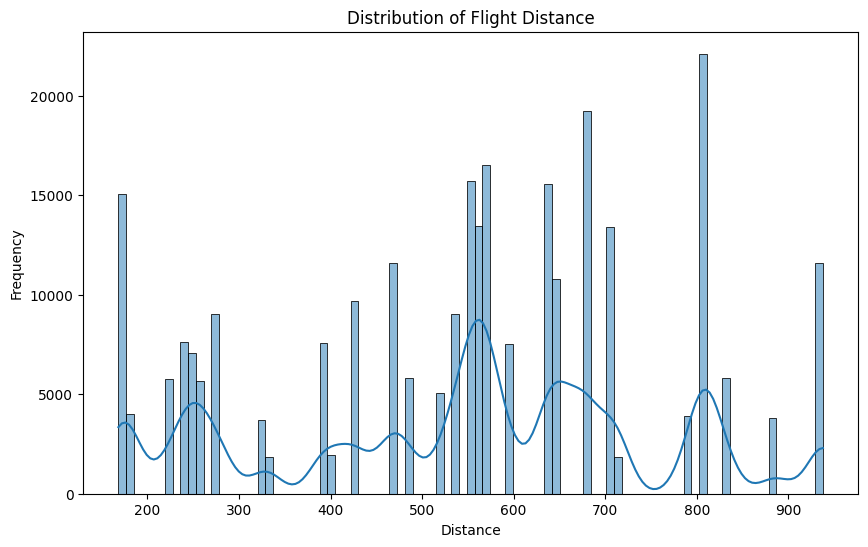

In [16]:
# Plot 3: Distribution of Distance
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='distance', kde=True)
plt.title('Distribution of Flight Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

### Plot 4: Count of Flights by Flight Type

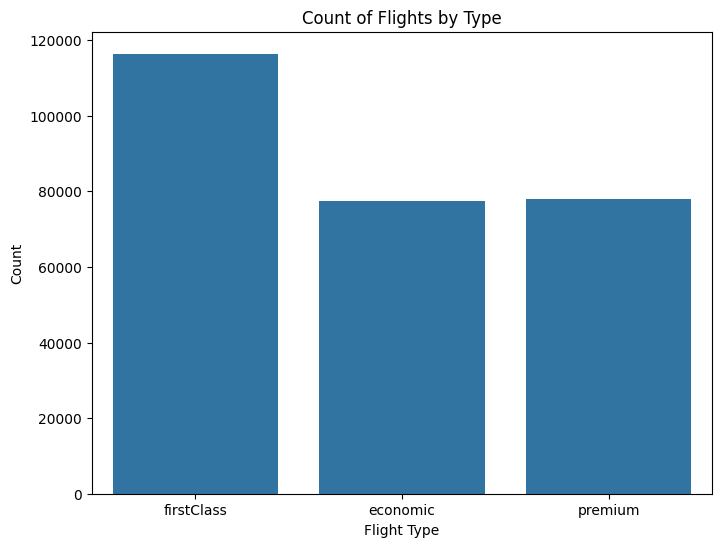

In [17]:
# Plot 4: Count of Flights by Flight Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='flightType')
plt.title('Count of Flights by Type')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

### Plot 5: Count of Flights by Agency

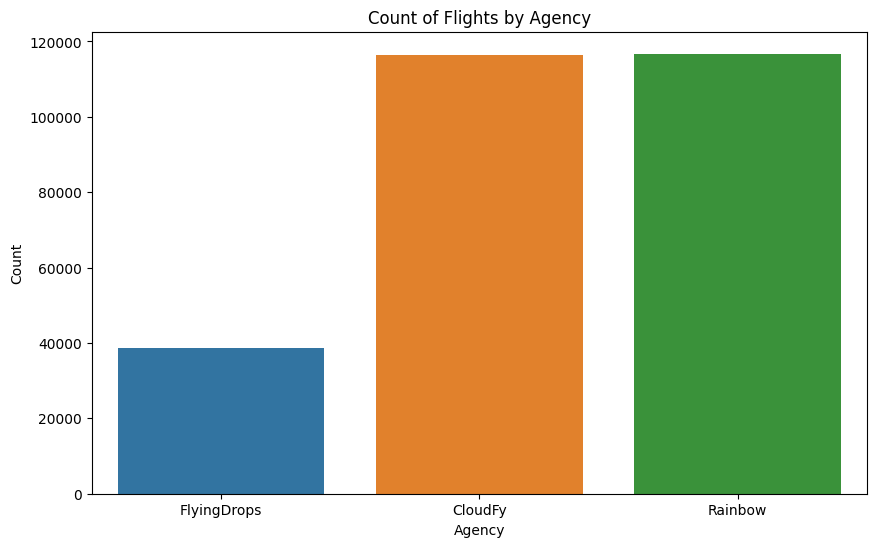

In [18]:
# Plot 5: Count of Flights by Agency
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='agency', hue='agency')
plt.title('Count of Flights by Agency')
plt.xlabel('Agency')
plt.ylabel('Count')
plt.show()

### Plot 6: Count of Flights by Departure City

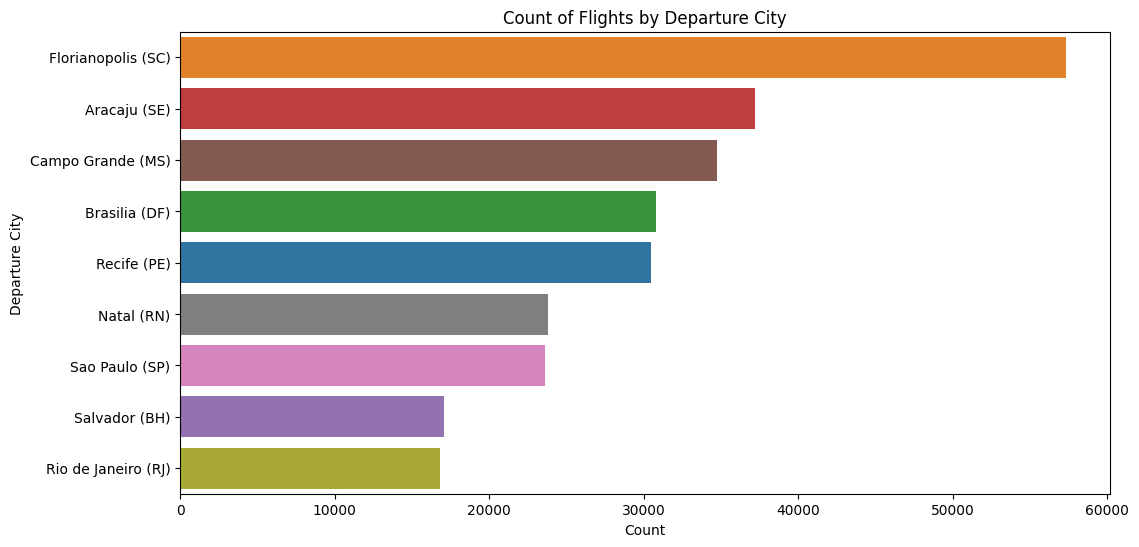

In [19]:
# Plot 6: Count of Flights by Departure City
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='from', order=df['from'].value_counts().index, hue='from')
plt.title('Count of Flights by Departure City')
plt.xlabel('Count')
plt.ylabel('Departure City')
plt.show()

### Plot 7: Count of Flights by Arrival City

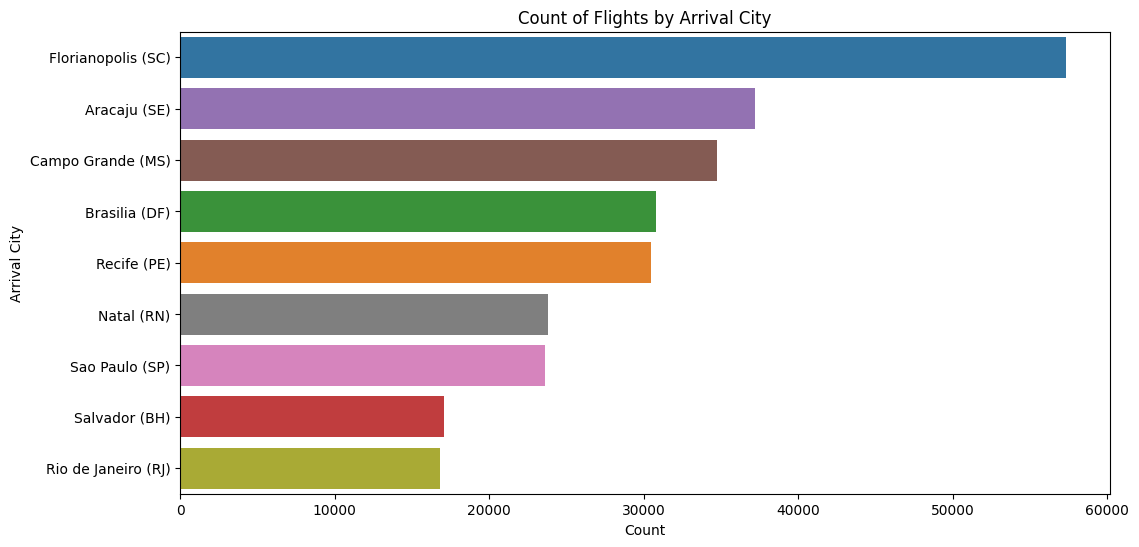

In [20]:
# Plot 7: Count of Flights by Arrival City
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='to', order=df['to'].value_counts().index, hue='to')
plt.title('Count of Flights by Arrival City')
plt.xlabel('Count')
plt.ylabel('Arrival City')
plt.show()

### Plot 8: Relationship between Time and Price

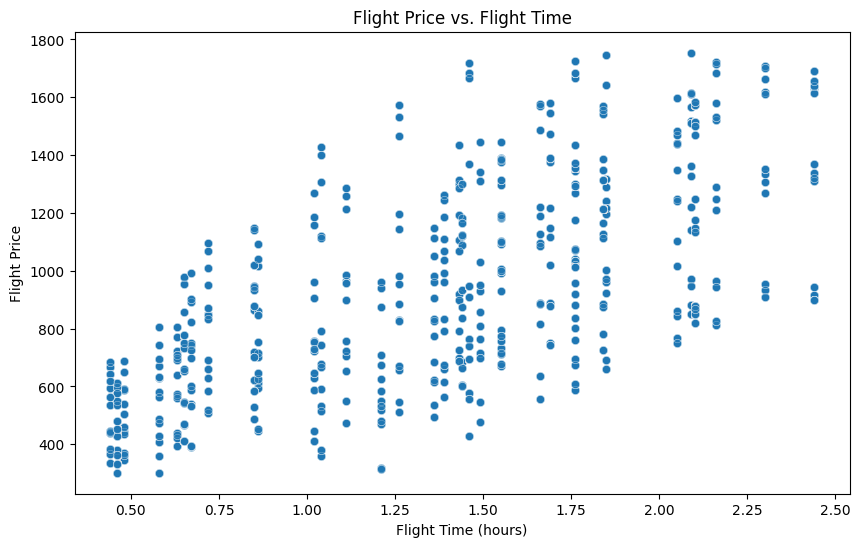

In [21]:
# Plot 8: Relationship between Time and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='time', y='price', alpha=0.5)
plt.title('Flight Price vs. Flight Time')
plt.xlabel('Flight Time (hours)')
plt.ylabel('Flight Price')
plt.show()

### Plot 9: Relationship between Distance and Price

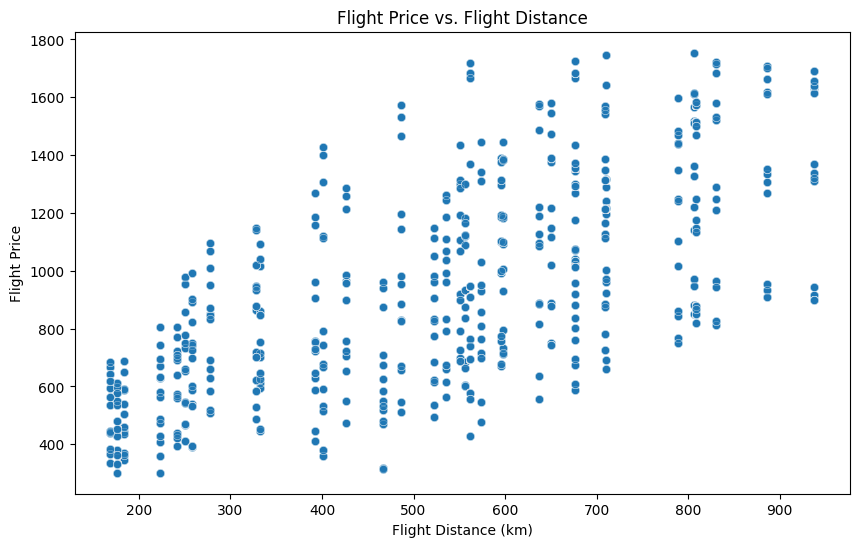

In [22]:
# Plot 9: Relationship between Distance and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance', y='price', alpha=0.5)
plt.title('Flight Price vs. Flight Distance')
plt.xlabel('Flight Distance (km)')
plt.ylabel('Flight Price')
plt.show()

### Plot 10: Price Distribution by Flight Type

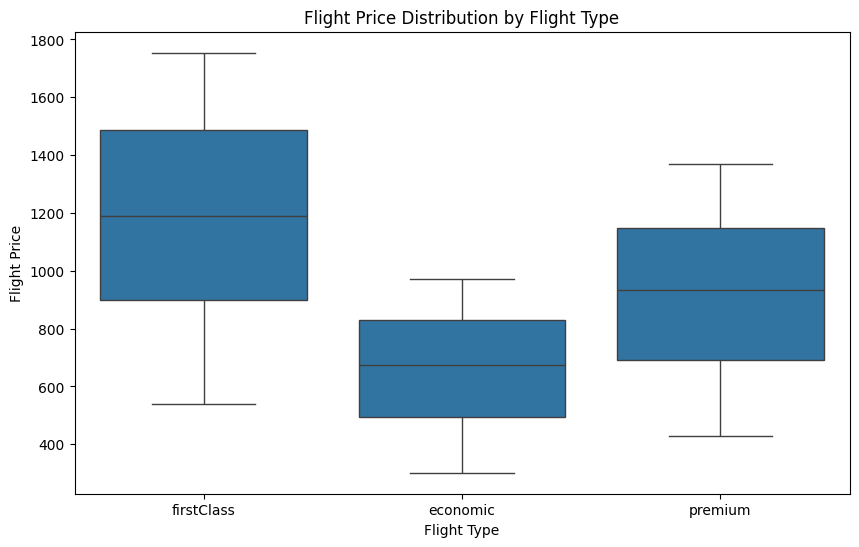

In [23]:
# Plot 10: Price Distribution by Flight Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='flightType', y='price')
plt.title('Flight Price Distribution by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Flight Price')
plt.show()

### Plot 11: Price Distribution by Agency

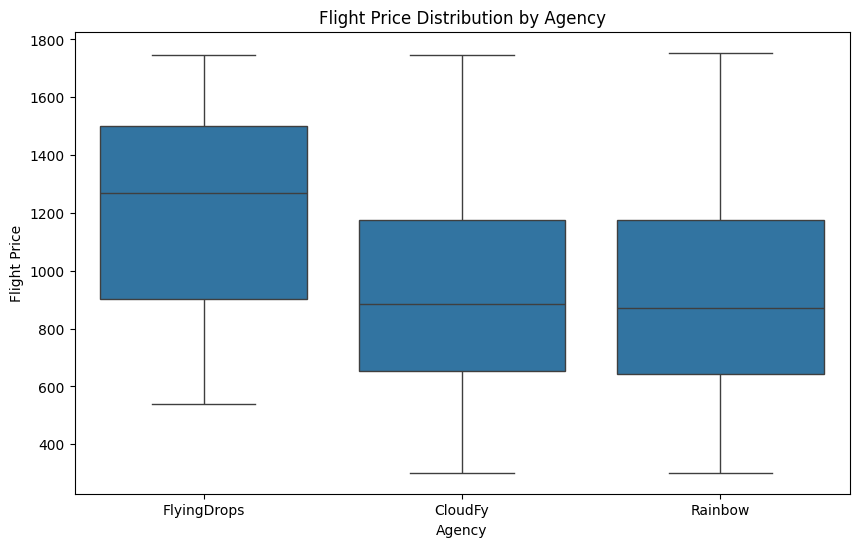

In [24]:
# Plot 11: Price Distribution by Agency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='agency', y='price')
plt.title('Flight Price Distribution by Agency')
plt.xlabel('Agency')
plt.ylabel('Flight Price')
plt.show()

### Plot 12: Price Distribution by Departure City

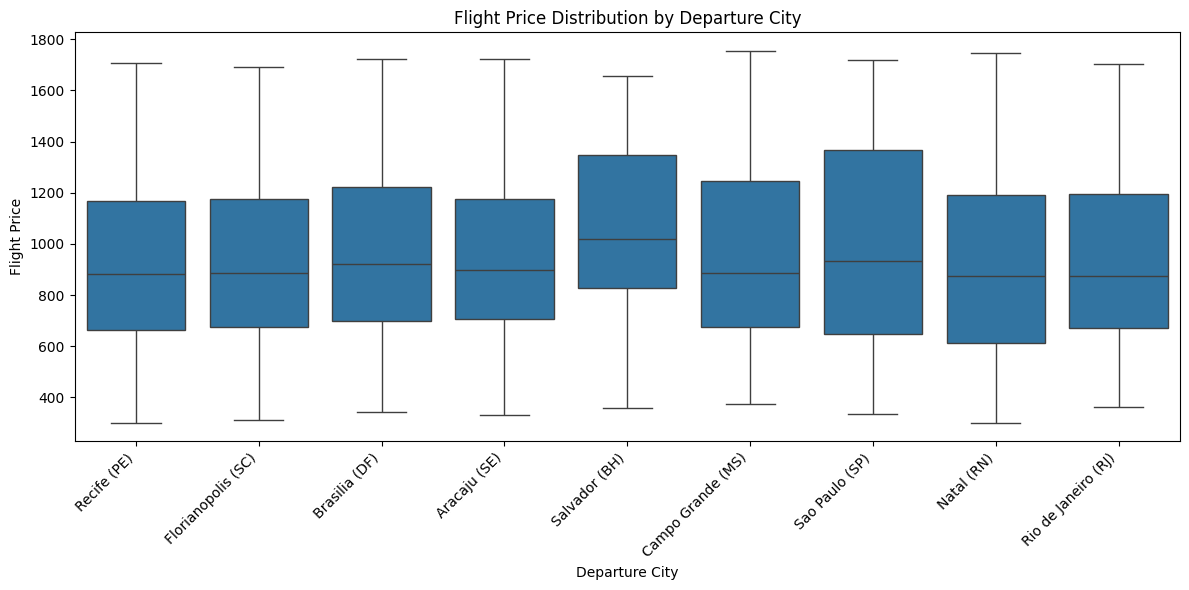

In [25]:
# Plot 12: Price Distribution by Departure City
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='from', y='price')
plt.title('Flight Price Distribution by Departure City')
plt.xlabel('Departure City')
plt.ylabel('Flight Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plot 13: Price Distribution by Arrival City

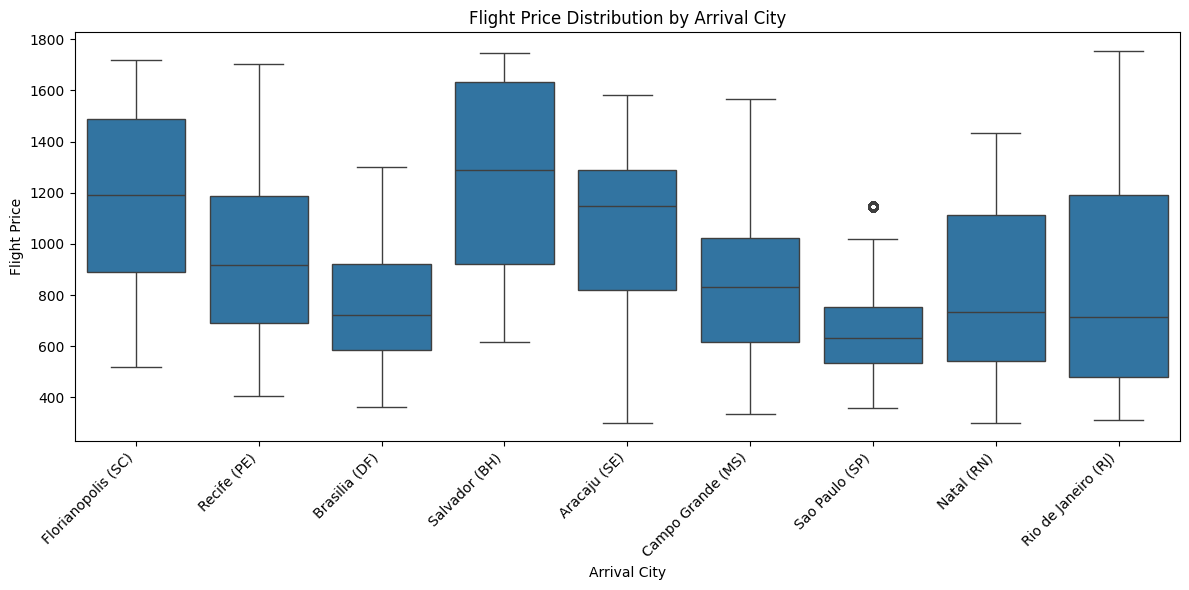

In [26]:
# Plot 13: Price Distribution by Arrival City
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='to', y='price')
plt.title('Flight Price Distribution by Arrival City')
plt.xlabel('Arrival City')
plt.ylabel('Flight Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plot 14: Price vs. Date

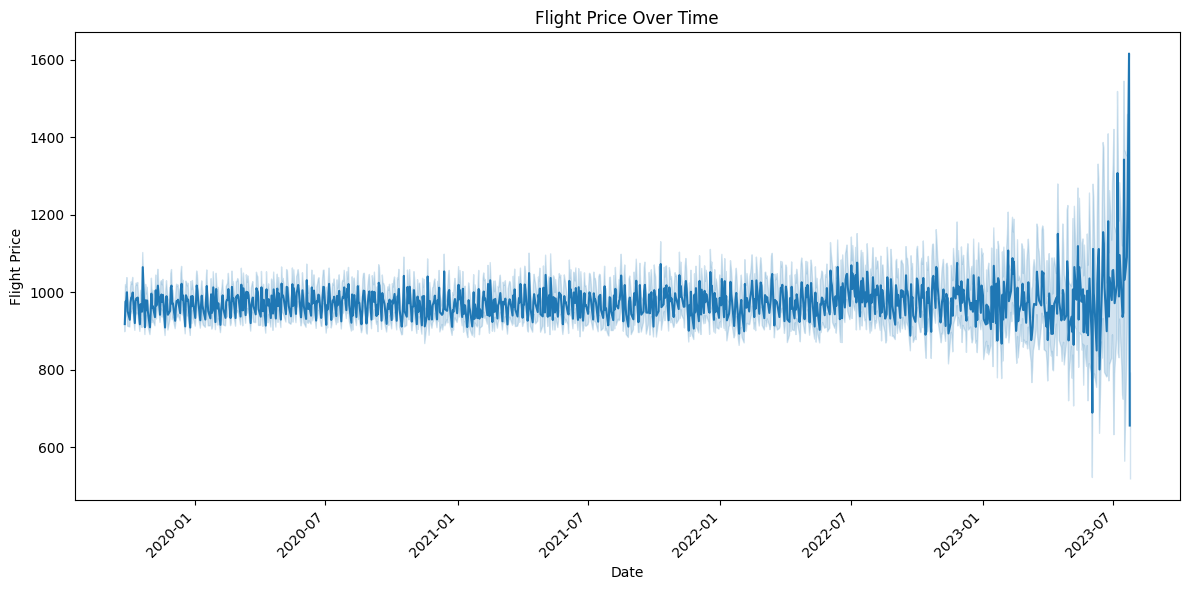

In [27]:
# Plot 14: Price vs. Date
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='price')
plt.title('Flight Price Over Time')
plt.xlabel('Date')
plt.ylabel('Flight Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plot 15: Count of Flights Over Time

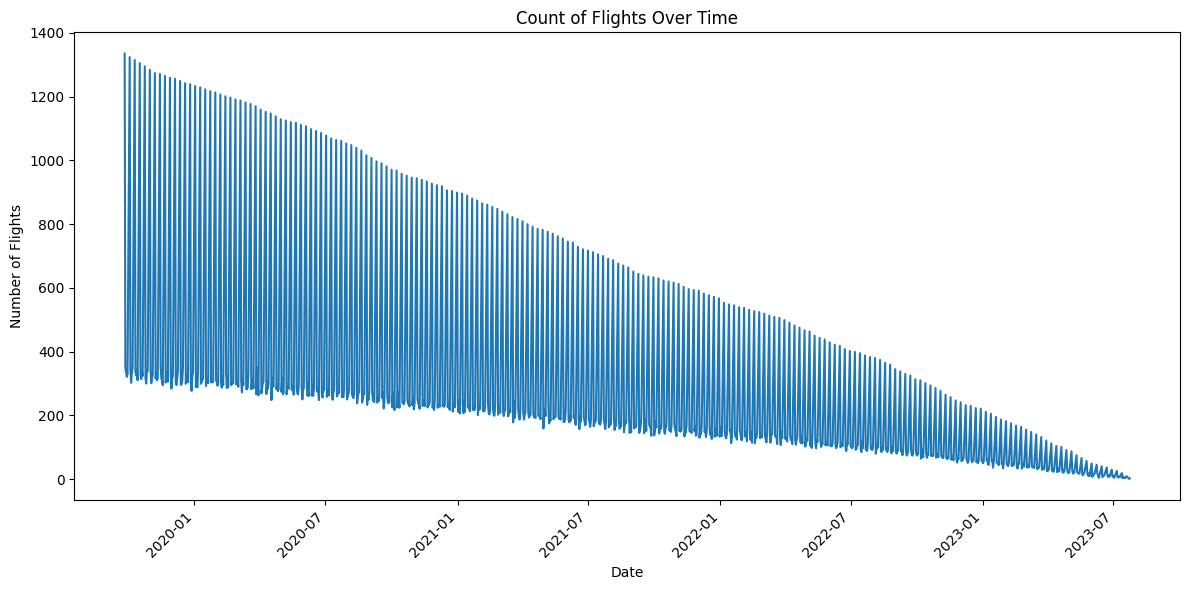

In [28]:
# Plot 15: Count of Flights Over Time
plt.figure(figsize=(12, 6))
df['date'].value_counts().sort_index().plot()
plt.title('Count of Flights Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Data Analysis Key Findings

*   Numerical features like age, flight price, hotel price, total price, flight time, and flight distance show varied distributions, with some exhibiting skewness and multiple peaks.
*   The distribution of genders is relatively balanced across male, female, and 'none' categories.
*   Hotel stays show similar frequencies for 1, 2, 3, and 4 days.
*   'firstClass' is the most frequent flight type.
*   'CloudFy' and 'Rainbow' agencies handle significantly more flights than 'FlyingDrops'.
*   '4You' is the company with the highest number of users.
*   'Florianopolis (SC)' is the most frequent departure and arrival city, while 'Rio de Janeiro (RJ)' is the least frequent for flights.
*   'Hotel K' and 'Hotel CB' have the highest number of stays among the listed hotels.
*   'Salvador (BH)' and 'Rio de Janeiro (RJ)' have the highest number of hotel stays by place, while 'Florianopolis (SC)' has the lowest.

### Insights or Next Steps

*   Further analysis could explore the relationships between numerical features (e.g., flight price vs. distance) or the impact of categorical features on numerical outcomes (e.g., how agency affects flight price).
*   Investigating the reasons behind the uneven distribution of flights by departure/arrival cities and hotel stays by place could provide valuable business insights.


## ***4. Features Selection AND Engineering***

### First detect the attributes which are not carring much information

**Columns Name:**  *'travelCode', 'userCode'* has less information in model training. This columns may be ignore from the data. In this project we will drop this columns from travel dataset.

In [29]:
df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [30]:
df.drop(['travelCode', 'userCode'], axis=1, inplace=True)

In [31]:
df.drop(['date'], axis=1, inplace=True)

In [32]:
df.head()

,from,to,flightType,price,time,distance,agency
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy


### With Correlation statistic noted the columns which has similar and less or heigh values in data

In [33]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
display(numerical_df.head())

,price,time,distance
0,1434.38,1.76,676.53
1,1292.29,1.76,676.53
2,1487.52,1.66,637.56
3,1127.36,1.66,637.56
4,1684.05,2.16,830.86


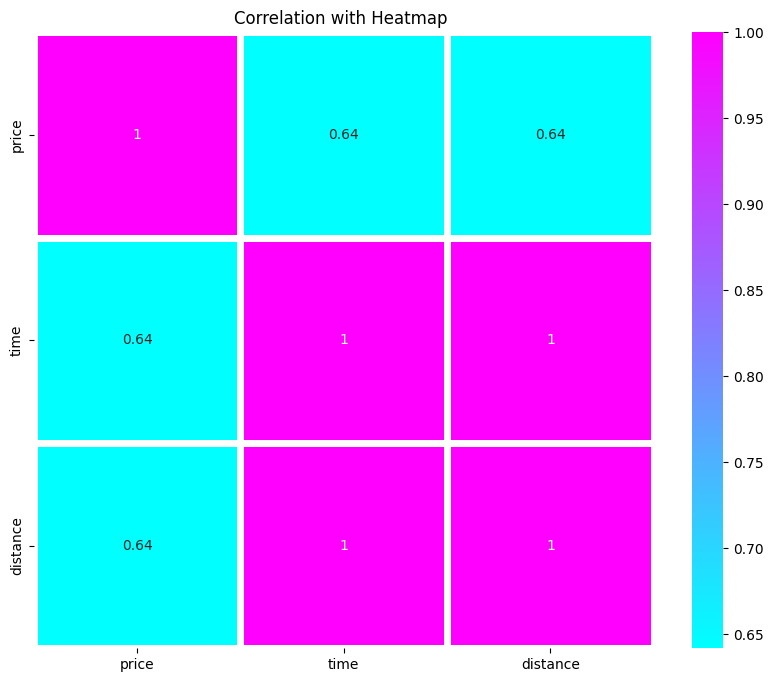

In [34]:
import matplotlib
plt.figure(figsize=(10, 8))
plt.title("Correlation with Heatmap ")
plt.xlabel("Features")
plt.ylabel("Correlation")
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='cool',linewidths=5,linecolor='white')
plt.show()

From above time and distance has equal correlation that is 1. It means we can eleminate one from dataset. Lets drop the time from dataset.

In [35]:
df.drop('time', axis=1, inplace=True)

### Encoding and Decoding

In [36]:
import matplotlib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import pickle


preprocessor = ColumnTransformer(
    transformers=[
        ('onehot_encoder', OneHotEncoder(sparse_output=False, dtype=int), ['flightType', 'agency']),
        ('ordinal_encoder', OrdinalEncoder(), ['from', 'to'])
    ],
    remainder='passthrough'  # Keep other columns (distance)
)

preprocessor.fit(df.drop('price', axis=1))

# Step 4: Save the fitted transformer to a pickle file 💾
path = 'D:\\AlmaBetter\\P01_travelPrice\\save_model\\'
with open(path+'transformer.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [37]:
df.to_csv(path+'preprocessed_data.csv', index=False)

In [38]:
preprocessor.transform(df.head())

array([[  0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   5.  ,   3.  ,
        676.53],
       [  0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   3.  ,   5.  ,
        676.53],
       [  0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   3.  ,
        637.56],
       [  0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   3.  ,   1.  ,
        637.56],
       [  0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   7.  ,
        830.86]])

## ***5. Model Development, Evaluation and Save Model in pickel file***

### Train test split :
 X - Inpute Attribute

 y - Output Attribute

 X_train - Training dataset
 y_train - Training dataset

 X_test - Testing dataset

 y_test - Testing dataset

In [39]:
# splitting dataset for training and testing to create ML model
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train

,from,to,flightType,distance,agency
111401,Recife (PE),Campo Grande (MS),firstClass,535.40,Rainbow
129167,Aracaju (SE),Campo Grande (MS),economic,650.10,Rainbow
179742,Florianopolis (SC),Salvador (BH),premium,937.77,Rainbow
52639,Aracaju (SE),Brasilia (DF),firstClass,425.98,FlyingDrops
68769,Recife (PE),Brasilia (DF),premium,242.21,Rainbow
...,...,...,...,...,...
119879,Recife (PE),Campo Grande (MS),premium,535.40,CloudFy
259178,Florianopolis (SC),Recife (PE),premium,676.53,Rainbow
131932,Campo Grande (MS),Salvador (BH),firstClass,522.34,CloudFy
146867,Campo Grande (MS),Sao Paulo (SP),firstClass,168.22,CloudFy


In [41]:
X_test =preprocessor.transform(X_test)
X_train =preprocessor.transform(X_train)

### Training and Evaluating model performance

In [42]:
# Initialize models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import numpy as np

# All Regression models for training the model base on training dataset as X_train and X_test
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'KNN Regressor': KNeighborsRegressor()
}

# Model training and Evaluation with different metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
result_df = pd.DataFrame(columns=['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'Bayesian Ridge','Decision Tree Regressor','Random Forest Regressor','AdaBoost Regressor','Gradient Boosting Regressor','KNN Regressor'])
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_sco = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} score: {r2_sco}")
    print(f"{name} MSE: {mse}")
    print(f"{name} MAE: {mae}")
    print(f"{name} RMSE: {rmse}")

    # save the each model metrics score in dataframe
    result_df[name] = {
        'Model': name,
        'R2 Score': r2_sco,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse
    }

Linear Regression score: 0.7774271077109627
Linear Regression MSE: 29328.252793886666
Linear Regression MAE: 133.37493277668688
Linear Regression RMSE: 171.25493509352268
Ridge Regression score: 0.7774271308241385
Ridge Regression MSE: 29328.24974828189
Ridge Regression MAE: 133.37497238153387
Ridge Regression RMSE: 171.25492620150197
Lasso Regression score: 0.777344233904772
Lasso Regression MSE: 29339.17300934038
Lasso Regression MAE: 133.35984843357707
Lasso Regression RMSE: 171.2868150481536
ElasticNet score: 0.6576157832538327
ElasticNet MSE: 45115.695618172394
ElasticNet MAE: 170.00491404704914
ElasticNet RMSE: 212.40455649108
Bayesian Ridge score: 0.7774271423425054
Bayesian Ridge MSE: 29328.248230515856
Bayesian Ridge MAE: 133.37499221700963
Bayesian Ridge RMSE: 171.25492177019572
Decision Tree Regressor score: 1.0
Decision Tree Regressor MSE: 8.736174426338578e-23
Decision Tree Regressor MAE: 7.143983624129047e-12
Decision Tree Regressor RMSE: 9.346750465449786e-12
Random Fore

### Final Model Performance and its results

In [43]:
r_df = result_df.transpose()
dff = r_df.sort_values(by=['R2 Score','MSE','RMSE','MAE'], ascending=[False,False,False,False])
dff

,Model,R2 Score,MSE,MAE,RMSE
Decision Tree Regressor,Decision Tree Regressor,1.0,0.0,0.0,0.0
Random Forest Regressor,Random Forest Regressor,1.0,0.0,0.0,0.0
KNN Regressor,KNN Regressor,1.0,0.0,0.0,0.0
Gradient Boosting Regressor,Gradient Boosting Regressor,0.983434,2182.853259,35.948362,46.721015
AdaBoost Regressor,AdaBoost Regressor,0.857262,18808.516167,114.375519,137.144144
Bayesian Ridge,Bayesian Ridge,0.777427,29328.248231,133.374992,171.254922
Ridge Regression,Ridge Regression,0.777427,29328.249748,133.374972,171.254926
Linear Regression,Linear Regression,0.777427,29328.252794,133.374933,171.254935
Lasso Regression,Lasso Regression,0.777344,29339.173009,133.359848,171.286815
ElasticNet,ElasticNet,0.657616,45115.695618,170.004914,212.404556


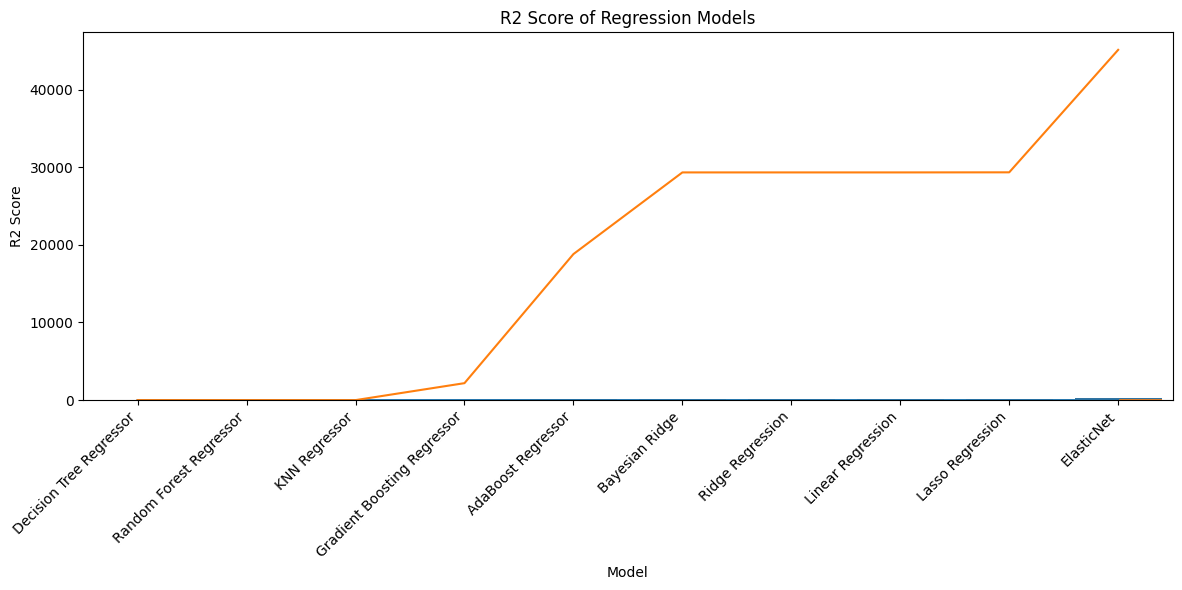

In [44]:
# Plot R2 Score
plt.figure(figsize=(12, 6))
sns.lineplot(x=dff.Model, y='R2 Score', data=dff)
sns.lineplot(x=r_df.Model, y='MSE', data=r_df)
sns.barplot(x=r_df.Model, y='RMSE', data=r_df)
sns.barplot(x=r_df.Model, y='MAE', data=r_df)
plt.title('R2 Score of Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Identify best model and Save

In [45]:
import pickle

# Find the best model based on R2 score
best_model_name = None
best_r2_score = -1

for name, model in regression_models.items():
    model.fit(X_train, y_train) # Re-fitting the model to ensure it's the latest trained version
    y_pred = model.predict(X_test)
    r2_sco = r2_score(y_test, y_pred)

    if r2_sco > best_r2_score:
        best_r2_score = r2_sco
        best_model_name = name
        best_model = model

print(f"The best model is: {best_model_name} with R2 score: {best_r2_score}")

# Save the best model to a pickle file
filename = f'{best_model_name.replace(" ", "_").lower()}_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved as {filename}")

The best model is: Decision Tree Regressor with R2 score: 1.0
Best model saved as decision_tree_regressor_model.pkl


In [46]:
path = 'D:\AlmaBetter\P01_travelPrice\save_model'

In [47]:
# Save the best model to a pickle file
filename = f'{best_model_name.replace(" ", "_").lower()}_model.pkl'
with open(path+filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model saved as {filename}")

Best model saved as decision_tree_regressor_model.pkl


# **2. REST API for Regression Model:**

Develop a REST API using Flask to serve the flight price prediction model, enabling real-time price predictions.

### Import Save model and Preprocessor for REST API

In [45]:
path = 'D:\\AlmaBetter\\P01_travelPrice\\save_model\\'
with open(path+'transformer.pkl', 'rb') as file:
    preprocessor = pickle.load(file)
with open(path+'decision_tree_regressor_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [46]:
new_df = df.head()
print(new_df)
print("----"*50)
abc = preprocessor.transform(new_df)
print(abc)
print("----"*50)
model.predict(abc)

                 from                  to  flightType    price  distance  \
0         Recife (PE)  Florianopolis (SC)  firstClass  1434.38    676.53   
1  Florianopolis (SC)         Recife (PE)  firstClass  1292.29    676.53   
2       Brasilia (DF)  Florianopolis (SC)  firstClass  1487.52    637.56   
3  Florianopolis (SC)       Brasilia (DF)  firstClass  1127.36    637.56   
4        Aracaju (SE)       Salvador (BH)  firstClass  1684.05    830.86   

        agency  
0  FlyingDrops  
1  FlyingDrops  
2      CloudFy  
3      CloudFy  
4      CloudFy  
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[[  0.     1.     0.     0.     1.     0.     5.     3.   676.53]
 [  0.     1.     0.     0.     1.     0.     3.     5.   676.53]
 [  0.     1.     0.     1.     0.     0.     1.     3.   637.56]
 [  0.     1.     0.     1.     0.     0. 

array([1434.38, 1292.29, 1487.52, 1127.36, 1684.05])

In [47]:
model.predict([[1,0,2,1,5,6,1,7,20]])

array([381.83])

### REST AIP settings and connect with ML model

#### Importing Neccessory Libraries

JIYJ5HJKQW7DQADBQFQU4ZFBCDAZPRYX

export NGROK_AUTHTOKEN=333xXBtgSRFYdu6zzZRy0SH1cIq_2x3kskHinBVTpvabp3JbB

In [ ]:
!pip install flask
!pip install flask-ngrok
from flask import Flask
from flask_ngrok import run_with_ngrok
import flask_ngrok
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
!ngrok authtoken "33HPbhpArGPqhSCh5DpmwIFMGXa_5k6YpHZRVysRw3ZkkpmQF"

/bin/bash: line 1: ngrok: command not found


In [ ]:
!pip uninstall flask-ngrok -y
!pip install pyngrok

Found existing installation: flask-ngrok 0.0.25
Uninstalling flask-ngrok-0.0.25:
  Successfully uninstalled flask-ngrok-0.0.25


#### Creating HTML file

In [ ]:
!mkdir templates

mkdir: cannot create directory ‘templates’: File exists


In [ ]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Travel Price Prediction</title>
    <style>
        /* --- General Body & Font Styling --- */
        body {
            font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif;
            background-color: #f4f7f9;
            color: #333;
            margin: 0;
            padding: 20px;
            display: flex;
            flex-direction: column;
            align-items: center;
        }

        /* --- Main Container for the App --- */
        .container {
            background-color: #ffffff;
            padding: 30px 40px;
            border-radius: 12px;
            box-shadow: 0 6px 20px rgba(0, 0, 0, 0.08);
            width: 100%;
            max-width: 600px;
            margin-bottom: 20px;
        }

        /* --- Header Styles --- */
        h1 {
            color: #2c3e50;
            text-align: center;
            margin-bottom: 10px;
        }
        h3 {
            color: #555;
            text-align: center;
            font-weight: 400;
            margin-bottom: 30px;
            border-bottom: 1px solid #eee;
            padding-bottom: 20px;
        }

        /* --- Form Styling --- */
        form label {
            display: block;
            margin-bottom: 8px;
            font-weight: 600;
            color: #34495e;
        }
        form input, form select {
            width: 100%;
            padding: 12px;
            margin-bottom: 20px;
            border: 1px solid #ccc;
            border-radius: 8px;
            box-sizing: border-box; /* Important for padding */
            font-size: 1em;
        }
        form input:focus, form select:focus {
            border-color: #007bff;
            outline: none;
            box-shadow: 0 0 5px rgba(0, 123, 255, 0.25);
        }

        /* --- Button Styling --- */
        button {
            width: 100%;
            padding: 15px;
            background-color: #007bff;
            color: white;
            border: none;
            border-radius: 8px;
            font-size: 1.2em;
            font-weight: bold;
            cursor: pointer;
            transition: background-color 0.3s;
        }
        button:hover {
            background-color: #0056b3;
        }

        /* --- Results Section --- */
        .results-section {
            margin-top: 20px;
        }
        .results-section h2 {
            color: #2c3e50;
            border-bottom: 2px solid #007bff;
            padding-bottom: 5px;
        }
        .results-section p {
            background-color: #e9ecef;
            padding: 15px;
            border-radius: 8px;
            font-family: 'Courier New', Courier, monospace;
            white-space: pre-wrap; /* Allows text to wrap */
            word-wrap: break-word;
        }
        #prediction-result {
            font-size: 1.8em;
            color: #28a745;
            font-weight: bold;
            text-align: center;
        }
    </style>
</head>

<body>
    <!-- Prediction Form -->
    <div class="container">
        <h1>Travel Price Prediction</h1>
        <h3>Enter customer and flight details to get a price estimate.</h3>

        <form method="POST" action="/predict">
            <!-- UPDATED "From" Dropdown -->
            <label for="from_loc">From:</label>
            <select id="from_loc" name="from">
                <option value="Recife (PE)">Recife (PE)</option>
                <option value="Florianopolis (SC)">Florianopolis (SC)</option>
                <option value="Brasilia (DF)">Brasilia (DF)</option>
                <option value="Aracaju (SE)">Aracaju (SE)</option>
                <option value="Salvador (BH)">Salvador (BH)</option>
                <option value="Campo Grande (MS)">Campo Grande (MS)</option>
                <option value="Sao Paulo (SP)">Sao Paulo (SP)</option>
                <option value="Natal (RN)">Natal (RN)</option>
                <option value="Rio de Janeiro (RJ)">Rio de Janeiro (RJ)</option>
            </select>

            <!-- UPDATED "To" Dropdown -->
            <label for="to_loc">To:</label>
            <select id="to_loc" name="to">
                <option value="Florianopolis (SC)">Florianopolis (SC)</option>
                <option value="Recife (PE)">Recife (PE)</option>
                <option value="Brasilia (DF)">Brasilia (DF)</option>
                <option value="Salvador (BH)">Salvador (BH)</option>
                <option value="Aracaju (SE)">Aracaju (SE)</option>
                <option value="Campo Grande (MS)">Campo Grande (MS)</option>
                <option value="Sao Paulo (SP)">Sao Paulo (SP)</option>
                <option value="Natal (RN)">Natal (RN)</option>
                <option value="Rio de Janeiro (RJ)">Rio de Janeiro (RJ)</option>
            </select>

            <label for="distance">Distance (in km):</label>
            <input type="number" id="distance" name="distance" placeholder="e.g., 5570" required>

            <label for="flightType">Flight Class:</label>
            <select id="flightType" name="flightType">
                <option value="firstClass">First Class</option>
                <option value="premium">Premium Economy</option>
                <option value="economic">Economy</option>
            </select>

            <label for="agency">Agency:</label>
            <select id="agency" name="agency">
                <option value="CloudFy">CloudFy</option>
                <option value="Rainbow">Rainbow</option>
                <option value="FlyingDrops">FlyingDrops</option>
            </select>

            <button type="submit">Predict Price</button>
        </form>
    </div>

    <!-- Results Display Section -->
    <div class="container results-section">
        <h2>Prediction Result</h2>
        <p id="prediction-result">{{ result }}</p>

        <div class="details">
            <h3>Submitted Data Details</h3>

            <h2>Raw Input:</h2>
            <p>{{ data }}</p>

            <h2>Preprocessed Data:</h2>
            <p>{{ data2 }}</p>
        </div>
    </div>

</body>
</html>

Overwriting templates/index.html


#### ML with REST API Implimentation

In [ ]:
# NEW CODE - USE THIS
from flask import Flask, request,render_template
from pyngrok import ngrok # <-- Correct import

path = '/content/drive/MyDrive/Alabetter/Second Half/M01 Productionization of ML Systems/Project: ML Productionization/'
with open(path+'transformer.pkl', 'rb') as file:
    preprocessor = pickle.load(file)
with open(path+'decision_tree_regressor_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Create a Flask app instance
app = Flask(__name__)

# --- ngrok AUTHTOKEN ---
# It's recommended to get a free authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
# and replace "YOUR_AUTHTOKEN" with it. This will give you longer session times.
ngrok.set_auth_token("33HPbhpArGPqhSCh5DpmwIFMGXa_5k6YpHZRVysRw3ZkkpmQF")
# ---------------------
# Start an ngrok tunnel to the Flask app
public_url = ngrok.connect(5000)
print(" * Your public URL is:", public_url)
data = {}
Pre_data = []

# Define a route that renders the HTML file
@app.route("/")
def home():
    # Flask's render_template function automatically looks
    # for files in the 'templates' folder.
    return render_template("index.html")

def get_data():
    data = {}
    if request.method in ['GET', 'POST']:
        travel_from = request.form.get('from') or request.args.get('from')
        travel_to = request.form.get('to') or request.args.get('to')
        flight_type = request.form.get('flightType') or request.args.get('flightType')
        agency = request.form.get('agency') or request.args.get('agency')
        distance = request.form.get('distance') or request.args.get('distance')

        data = {
            'from': travel_from,
            'to': travel_to,
            'flightType': flight_type,
            'agency': agency,
            'distance': distance
        }
    print("Request method:", request.method)
    print("Form data:", request.form)
    print("Args data:", request.args)
    print(data)
    return data


@app.route('/predict', methods=['GET', 'POST'])
def price_prediction():

    if request.method == 'POST':
        data = get_data()
    Pre_data = pd.DataFrame([data])
    print('**********************************')
    print(Pre_data)

    print('**********************************')
    pre_data = preprocessor.transform(Pre_data)
    print(pre_data)
    output = model.predict(pre_data)[0]
    output = np.round(output, 2)
    print(output)

    return render_template('index.html', data=Pre_data,data2=pre_data,result= output)



# Run the Flask app
# The app will be accessible from the public URL provided by ngrok
if __name__ == "__main__":
    app.run()

 * Your public URL is: NgrokTunnel: "https://perilously-preinstructional-kara.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [29/Sep/2025 09:56:54] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Sep/2025 09:56:59] "POST /predict HTTP/1.1" 200 -


Request method: POST
Form data: ImmutableMultiDict([('from', 'Recife (PE)'), ('to', 'Florianopolis (SC)'), ('distance', '7'), ('flightType', 'firstClass'), ('agency', 'CloudFy')])
Args data: ImmutableMultiDict([])
{'from': 'Recife (PE)', 'to': 'Florianopolis (SC)', 'flightType': 'firstClass', 'agency': 'CloudFy', 'distance': '7'}
**********************************
          from                  to  flightType   agency distance
0  Recife (PE)  Florianopolis (SC)  firstClass  CloudFy        7
**********************************
[[0 1 0 1 0 0 5.0 3.0 '7']]
563.0


# **3. Containerization:**

Package and deploy the flight price prediction model using Docker, ensuring portability and ease of deployment.



# **4.Kubernetes for Scalability:**

Deploy the model using Kubernetes to manage scalability and handle varying loads efficiently.



# **5. Automated Workflows with Apache Airflow:**

Design and implement automated workflows for managing the travel data, specifically for the regression models. Develop Directed Acyclic Graphs (DAGs) to orchestrate complex workflows in an efficient and manageable way.



# **6. CI/CD Pipeline with Jenkins:**

Implement a Continuous Integration/Continuous Deployment (CI/CD) pipeline using Jenkins for consistent and reliable deployment of the travel price prediction model.



# **7. Model Tracking with MLFlow:**

Utilize MLFlow for tracking and managing different versions of the travel price prediction model, ensuring a systematic approach to model iteration and deployment.



# **8. Gender Classification Model:**

Deploy a classification model to categorize a user's gender.



# **9. Travel Recommendation Model:**

Build a recommendation model to provide hotel suggestions based on user preferences and historical data. Develop a Streamlit web application to display insights and visualizations derived from the deployed travel recommendation model, offering an interactive and user-friendly interface for data exploration.